# Convert Small Images into One Big image

- author  :Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNRS
- creation date : July 8th 2020
- Last verification : December 14th 2021

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
import numpy as np
import pandas as pd
import os
import sys
%matplotlib inline

In [2]:
from astropy.io import fits

In [3]:
import re

In [4]:
#to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10,6),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [5]:
plt.rcParams.update({'figure.max_open_warning': 0}) # to see a large number of files

In [6]:
%load_ext autoreload
%autoreload 2

# Configuration

In [7]:
DATADIR="../data/atm"

In [8]:
atmospheric_basename_files=os.listdir(DATADIR)

In [9]:
inputfile=os.path.join(DATADIR,atmospheric_basename_files[0])

In [10]:
sorted(atmospheric_basename_files)

['lsst_atm_10year_01.fits',
 'lsst_atm_10year_02.fits',
 'lsst_atm_10year_03.fits',
 'lsst_atm_10year_04.fits',
 'lsst_atm_10year_05.fits',
 'lsst_atm_10year_06.fits',
 'lsst_atm_10year_07.fits',
 'lsst_atm_10year_08.fits',
 'lsst_atm_10year_09.fits',
 'lsst_atm_10year_10.fits']

In [11]:
atmospheric_basename_files

['lsst_atm_10year_01.fits',
 'lsst_atm_10year_07.fits',
 'lsst_atm_10year_06.fits',
 'lsst_atm_10year_10.fits',
 'lsst_atm_10year_09.fits',
 'lsst_atm_10year_05.fits',
 'lsst_atm_10year_04.fits',
 'lsst_atm_10year_08.fits',
 'lsst_atm_10year_03.fits',
 'lsst_atm_10year_02.fits']

In [12]:
'lsst_atm_10year_01.fits'.split('.')

['lsst_atm_10year_01', 'fits']

# Open all atmospheric files

In [13]:
idx=0
all_data=[]
all_hdr=[]
all_wl=[]
for file in sorted(atmospheric_basename_files):
    
    if file.split(".")[-1]=="fits":
       
        if re.search('.*(bintab).*',file):
            continue
            
        if re.search('lsst_atm_10year_bigimg.fits',file):
            continue
        
        print(file)
        inputfile=os.path.join(DATADIR,file)
        hdu = fits.open(inputfile)
        all_hdr.append(hdu[0].header)
        all_data.append(hdu[0].data[1:,:])
        all_wl.append(hdu[0].data[0,:])
        hdu.close()
        
    idx+=1
    

lsst_atm_10year_01.fits
lsst_atm_10year_02.fits
lsst_atm_10year_03.fits
lsst_atm_10year_04.fits
lsst_atm_10year_05.fits
lsst_atm_10year_06.fits
lsst_atm_10year_07.fits
lsst_atm_10year_08.fits
lsst_atm_10year_09.fits
lsst_atm_10year_10.fits


In [14]:
data=np.vstack(all_data)

In [15]:
data.shape

(3650, 958)

## Extract info from header

### Pick up the header column index 

In [16]:
hdr=all_hdr[0]

In [17]:
NbAtmSimul=hdr['NBATMSIM']
idx_out_num=hdr['ID_NUM']
idx_out_year=hdr['ID_YEAR']
idx_out_am=hdr['ID_AM']
idx_out_vaod=hdr['ID_VAOD']
idx_out_pwv=hdr['ID_PWV']
idx_out_o3=hdr['ID_O3']
idx_out_cld=hdr['ID_CLD']
idx_out_res=hdr['ID_RES']

In [18]:
idx_out_year

1

## Atmospheric data

In [19]:
num=data[1:,idx_out_num]
year=data[1:,idx_out_year]
airmass=data[1:,idx_out_year]
vaod=data[1:,idx_out_vaod] # vertical aerosol depth
pwv=data[1:,idx_out_pwv]   # precipitable water vapor (mm)
o3=data[1:,idx_out_o3]     # ozone
cld=data[1:,idx_out_cld]   # clouds (not used)

In [20]:
# Extract wavelength Wavelength
wl=all_wl[0][idx_out_res:]
transm=data[:,idx_out_res:]

In [21]:
data.shape

(3650, 958)

In [22]:
all_wl[0].shape

(958,)

In [23]:
all_wl[0][np.newaxis,:].shape

(1, 958)

In [24]:
data_out=np.vstack([all_wl[0][np.newaxis,:],data])

In [25]:
data_out.shape

(3651, 958)

In [26]:
len(transm[0,:])

951

In [27]:
len(wl)

951

In [28]:
NBSIM=transm.shape[0]

In [29]:
NBSIM

3650

Text(0.5, 1.0, 'image of atmospheric simulation')

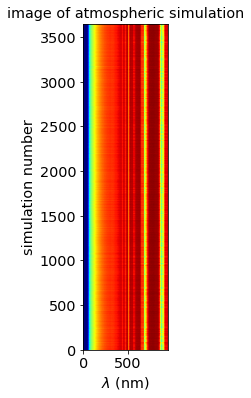

In [30]:
plt.imshow(transm,origin="lower",cmap='jet')
plt.xlabel("$\\lambda$ (nm)")
plt.ylabel("simulation number")
plt.title("image of atmospheric simulation")

# Output in one fits file

## hdu and output file

In [31]:
hdr['OBSERVER'] = "SDC"
hdr['COMMENT'] = "atm sim data challenge"
hdr['NBATMSIM'] = data.shape[0]

In [32]:
hdr

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  958                                                  
NAXIS2  =                  366                                                  
NBATMSIM=                 3650                                                  
ID_NUM  =                    0                                                  
ID_YEAR =                    1                                                  
ID_AM   =                    2                                                  
ID_VAOD =                    3                                                  
ID_PWV  =                    4                                                  
ID_O3   =                    5                                                  
ID_CLD  =                   

In [33]:
primary_hdu = fits.PrimaryHDU(data_out,header=hdr)
hdu_out = fits.HDUList([primary_hdu])

In [34]:
output_file=os.path.join(DATADIR,'lsst_atm_10year_bigimg.fits')

In [35]:
hdu_out.writeto(output_file,overwrite=True)